In [415]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import random 
from sklearn import metrics
from sklearn.dummy import DummyRegressor
sns.set(color_codes=True)

In [416]:
loan=pd.read_csv("loans.csv")

In [417]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [418]:
print(loan.shape)
loan.nunique()

(9578, 14)


credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

#### Barplot for the dependent variable

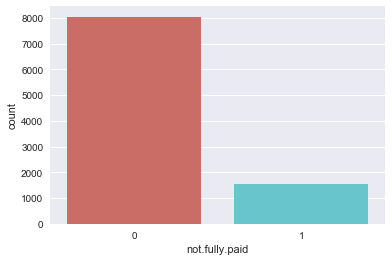

In [419]:
sns.countplot(x='not.fully.paid',data=loan, palette='hls')
plt.show()

##### Check the missing values

In [420]:
loan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [421]:
8045/(1533+8045)

0.8399457089162664

##### Customer purpose distribution

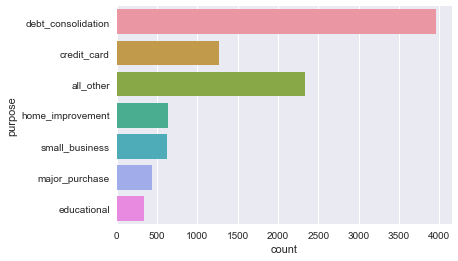

In [422]:
sns.countplot(y="purpose", data=loan)
plt.show()

##### •	delinq.2yrs

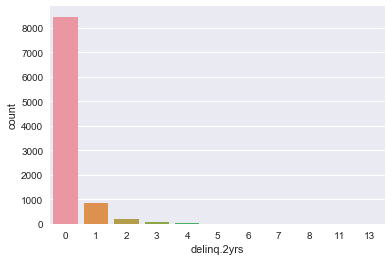

In [423]:
sns.countplot(x="delinq.2yrs", data=loan)
plt.show()

##### pub.rec

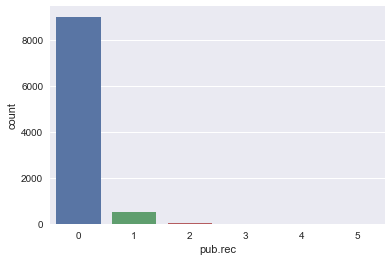

In [424]:
sns.countplot(x="pub.rec", data=loan)
plt.show()

##### debt to income ratio

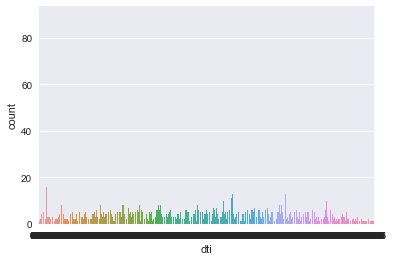

In [425]:
sns.countplot(x="dti", data=loan)
plt.show()

##### Check the independence between the independent variables

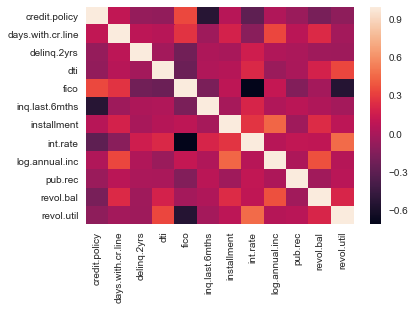

In [426]:
loan2=loan[loan.columns.difference(['not.fully.paid'])]
sns.heatmap(loan2.corr())
plt.show()

##### dummies for independent variables

In [427]:
#loan3 = pd.get_dummies(loan, columns =['purpose', 'credit.policy','not.fully.paid'])

In [428]:

#loan3.drop(loan3.columns[[19,20]], axis=1, inplace=True)
#loan3.columns
#loan4=loan3['not.fully.paid_1']

In [429]:
#sns.heatmap(loan3.corr())

In [430]:
#loan3=loan3[loan3.columns.difference(['not.fully.paid_1'])]
#X,y=loan3,loan4

In [431]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

##### Check the independence between the independent variables

In [432]:
#sns.heatmap(loan3.corr())
#plt.show()

In [433]:
#classifier = LogisticRegression(random_state=101)
#classifier.fit(X_train, y_train)

In [434]:
#y_pred = classifier.predict(X_test)
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

In [435]:
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

In [436]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

In [437]:
# Use score method to get accuracy of model
#score = classifier.score(X_test, y_test)
#print(score)

In [438]:
loan['inq.last.6mths'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 33,  9, 18, 14, 15, 13, 12, 10,
       19, 11, 16, 20, 27, 25, 28, 31, 24, 17, 32], dtype=int64)

In [439]:
bins_delinq = [-1,0, 7,13]
bins_fico=[600,650,700,850]
bins_ir=[0.0,0.1,0.15,0.2,0.25]
bins_pr=[-1,0,3,5]
bins_6mths=[-1,0,9,18,27,36]
#loan['inq.last.6mths'].unique()


In [440]:
loan['delinq.2yrs'] = pd.cut(loan['delinq.2yrs'], bins_delinq)
loan['int.rate']=pd.cut(loan['int.rate'], bins_ir)
loan['fico']=pd.cut(loan['fico'], bins_fico)
loan['pub.rec']=pd.cut(loan['pub.rec'], bins_pr)
loan['inq.last.6mths']=pd.cut(loan['inq.last.6mths'], bins_6mths)


In [441]:
loan['int.rate'].unique()

[(0.1, 0.15], (0.0, 0.1], (0.15, 0.2], (0.2, 0.25]]
Categories (4, interval[float64]): [(0.0, 0.1] < (0.1, 0.15] < (0.15, 0.2] < (0.2, 0.25]]

In [442]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,"(0.1, 0.15]",829.10,11.350407,19.48,"(700, 850]",5639.958333,28854,52.1,"(-1, 0]","(-1, 0]","(-1, 0]",0
1,1,credit_card,"(0.1, 0.15]",228.22,11.082143,14.29,"(700, 850]",2760.000000,33623,76.7,"(-1, 0]","(-1, 0]","(-1, 0]",0
2,1,debt_consolidation,"(0.1, 0.15]",366.86,10.373491,11.63,"(650, 700]",4710.000000,3511,25.6,"(0, 9]","(-1, 0]","(-1, 0]",0
3,1,debt_consolidation,"(0.1, 0.15]",162.34,11.350407,8.10,"(700, 850]",2699.958333,33667,73.2,"(0, 9]","(-1, 0]","(-1, 0]",0
4,1,credit_card,"(0.1, 0.15]",102.92,11.299732,14.97,"(650, 700]",4066.000000,4740,39.5,"(-1, 0]","(0, 7]","(-1, 0]",0



### Data exploration

In [443]:
loan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [444]:
loan.groupby('not.fully.paid').mean()

,credit.policy,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util
not.fully.paid,,,,,,,
0,0.832318,314.574123,10.941091,12.494413,4592.632624,16122.724425,45.759608
1,0.661448,342.785114,10.885023,13.195838,4393.541259,21066.293542,52.255075


In [445]:
loan.groupby('purpose').mean()

,credit.policy,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
purpose,,,,,,,,
all_other,0.787216,244.937542,10.845313,11.079498,4311.706153,12883.039897,39.712321,0.166023
credit_card,0.808241,319.500713,11.047230,14.099398,4857.005943,23180.020602,53.600475,0.115689
debt_consolidation,0.814506,358.984390,10.912909,14.076462,4533.037139,17146.710639,54.125504,0.152388
educational,0.740525,217.547201,10.549956,11.344927,4008.595724,10828.897959,38.801166,0.201166
home_improvement,0.813990,337.071590,11.201979,10.197504,5201.995562,17328.756757,34.274626,0.170111
major_purchase,0.848970,243.483913,10.844895,10.159886,4325.969108,7281.453089,32.457895,0.112128
small_business,0.799677,433.826607,11.146216,10.793296,4892.115778,27581.203554,40.070436,0.277868


In [446]:
loan.groupby('fico').mean()

,credit.policy,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
fico,,,,,,,,
"(600, 650]",0.008658,220.027619,10.682010,13.296494,3281.488997,12458.683983,67.651515,0.320346
"(650, 700]",0.726817,303.205817,10.889697,13.820922,4110.864098,17152.605013,59.768426,0.200501
"(700, 850]",0.897517,335.191490,10.974498,11.672541,4951.027907,16928.336009,36.240351,0.123017


In [447]:
loan.groupby('pub.rec').mean()

,credit.policy,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
pub.rec,,,,,,,,
"(-1, 0]",0.809735,320.694233,10.929982,12.587744,4511.601988,17168.625125,46.284453,0.154673
"(0, 3]",0.728905,293.104434,10.965417,12.949964,5353.951227,12838.256732,55.119210,0.247756
"(3, 5]",0.500000,318.970000,11.288119,2.390000,5369.520833,3603.500000,51.100000,0.000000


In [448]:
loan.groupby('delinq.2yrs').mean()

,credit.policy,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
delinq.2yrs,,,,,,,,
"(-1, 0]",0.812958,319.132963,10.926621,12.648381,4483.493290,17229.076850,47.127456,0.158075
"(0, 7]",0.746643,318.830922,10.972291,12.315013,5147.319606,14565.709042,44.343205,0.175470
"(7, 13]",0.000000,292.553333,11.470731,3.630000,4028.652778,2839.000000,35.900000,0.000000


In [449]:
loan.groupby('inq.last.6mths').mean()

,credit.policy,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
inq.last.6mths,,,,,,,,
"(-1, 0]",0.923288,320.730883,10.913000,12.401496,4700.525593,16813.761342,47.278537,0.117404
"(0, 9]",0.744313,318.729827,10.942678,12.726006,4486.352439,16998.001881,46.459336,0.183855
"(9, 18]",0.000000,287.753976,11.062089,12.774578,3907.961847,15862.132530,49.646988,0.325301
"(18, 27]",0.000000,232.394286,10.854665,16.515714,3272.440476,15003.142857,47.728571,0.285714
"(27, 36]",0.000000,154.135000,10.316006,14.417500,2061.500000,10350.000000,47.125000,0.500000


In [450]:
loan.groupby('int.rate').mean()

,credit.policy,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid
int.rate,,,,,,,,
"(0.0, 0.1]",0.931808,231.392838,10.902795,10.047529,5134.200019,12522.308924,24.986270,0.074142
"(0.1, 0.15]",0.810838,329.475732,10.921195,13.103134,4428.065389,17394.979428,50.708373,0.170764
"(0.15, 0.2]",0.588962,408.061176,11.014904,14.539223,4239.745189,21056.506899,64.205316,0.244735
"(0.2, 0.25]",0.405405,508.362432,11.347677,11.588378,4088.353604,44359.702703,55.459459,0.351351


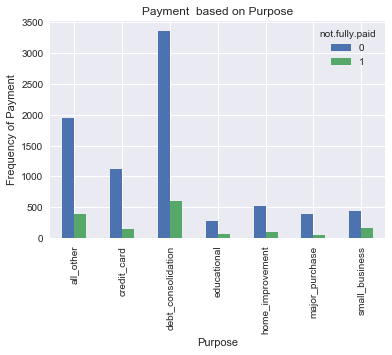

In [451]:
%matplotlib inline
pd.crosstab(loan.purpose,loan['not.fully.paid']).plot(kind='bar')
plt.title('Payment  based on Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency of Payment')
plt.savefig('purpose_not_paid')

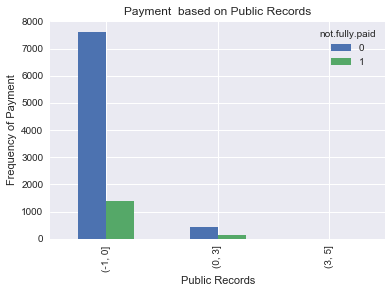

In [452]:
%matplotlib inline
pd.crosstab(loan['pub.rec'],loan['not.fully.paid']).plot(kind='bar')
plt.title('Payment  based on Public Records')
plt.xlabel('Public Records')
plt.ylabel('Frequency of Payment')
plt.savefig('pr_not_paid')

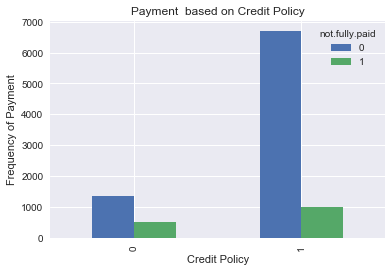

In [453]:
%matplotlib inline
pd.crosstab(loan['credit.policy'],loan['not.fully.paid']).plot(kind='bar')
plt.title('Payment  based on Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Frequency of Payment')
plt.savefig('Credit_Policy_not_paid')

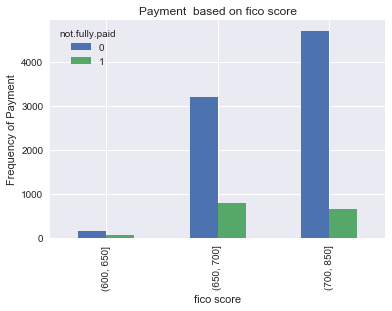

In [454]:
%matplotlib inline
pd.crosstab(loan['fico'],loan['not.fully.paid']).plot(kind='bar')
plt.title('Payment  based on fico score')
plt.xlabel('fico score')
plt.ylabel('Frequency of Payment')
plt.savefig('fico_score_not_paid')

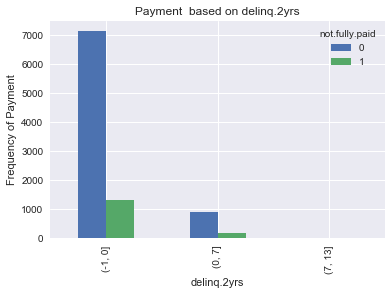

In [455]:
%matplotlib inline
pd.crosstab(loan['delinq.2yrs'],loan['not.fully.paid']).plot(kind='bar')
plt.title('Payment  based on delinq.2yrs')
plt.xlabel('delinq.2yrs')
plt.ylabel('Frequency of Payment')
plt.savefig('delinq_2yrs_not_paid')

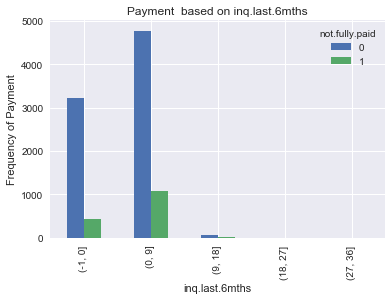

In [456]:
%matplotlib inline
pd.crosstab(loan['inq.last.6mths'],loan['not.fully.paid']).plot(kind='bar')
plt.title('Payment  based on inq.last.6mths')
plt.xlabel('inq.last.6mths')
plt.ylabel('Frequency of Payment')
plt.savefig('inq_last_6mths_not_paid')

##### Create dummy variables

In [457]:
X_features = list(loan.columns )
X_features

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [458]:
loan_complete = pd.get_dummies(loan[X_features], drop_first = True)

In [459]:
loan_complete.head().T

,0,1,2,3,4
credit.policy,1.000000,1.000000,1.000000,1.000000,1.000000
installment,829.100000,228.220000,366.860000,162.340000,102.920000
log.annual.inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.480000,14.290000,11.630000,8.100000,14.970000
days.with.cr.line,5639.958333,2760.000000,4710.000000,2699.958333,4066.000000
revol.bal,28854.000000,33623.000000,3511.000000,33667.000000,4740.000000
revol.util,52.100000,76.700000,25.600000,73.200000,39.500000
not.fully.paid,0.000000,0.000000,0.000000,0.000000,0.000000
purpose_credit_card,0.000000,1.000000,0.000000,0.000000,1.000000
purpose_debt_consolidation,1.000000,0.000000,1.000000,1.000000,0.000000


In [460]:
loan_complete2=loan_complete[loan_complete.columns.difference(['not.fully.paid'])]

In [461]:
X,y=loan_complete2,loan_complete['not.fully.paid']

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [463]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )

In [464]:
lg = logit.fit()

         Current function value: 0.413039
         Iterations: 35


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [465]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6677
Method:                           MLE   Df Model:                           26
Date:                Thu, 23 Aug 2018   Pseudo R-squ.:                 0.06806
Time:                        18:34:15   Log-Likelihood:                -2769.0
converged:                      False   LL-Null:                       -2971.2
                                        LLR p-value:                 1.547e-69
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.2211      0.763      1.601      0.109      -0.274       2.716
credit.policy                 -0.5572      0.088     -6.312      0.000      -0.730      -0.384
days.with.cr.line          -1.242e-05    1.6e-05     -0.776      0.438   -4.38e-05    1.89e-05
delinq.2yrs_(0, 7]            -0.0631      0.109     -0.580      0.562      -0.276       0.150
delinq.2yrs_(7, 13]         -180.7063   1.67e+39  -1.08e-37      1.000   -3.28e+39    3.28e+39
dti                           -0.0008      0.005     -0.141      0.888      -0.011       0.010
fico_(650, 700]               -0.2949      0.190     -1.551      0.121      -0.668       0.078
fico_(700, 850]               -0.5320      0.207     -2.570      0.010      -0.938      -0.126
inq.last.6mths_(0, 9]          0.4421      0.079      5.593      0.000       0.287       0.597
inq.last.6mths_(18, 27]        1.0177      0.942      1.080      0.280      -0.830       2.865
inq.last.6mths_(27, 36]        0.5314      1.237      0.430      0.667      -1.893       2.956
inq.last.6mths_(9, 18]         0.4571      0.316      1.447      0.148      -0.162       1.076
installment                    0.0009      0.000      4.588      0.000       0.001       0.001
int.rate_(0.1, 0.15]           0.4772      0.122      3.906      0.000       0.238       0.717
int.rate_(0.15, 0.2]           0.5239      0.159      3.286      0.001       0.211       0.836
int.rate_(0.2, 0.25]           0.7022      0.410      1.713      0.087      -0.101       1.505
log.annual.inc                -0.2853      0.071     -4.030      0.000      -0.424      -0.147
pub.rec_(0, 3]                 0.4757      0.129      3.683      0.000       0.223       0.729
pub.rec_(3, 5]               -22.7035   1.93e+05     -0.000      1.000   -3.78e+05    3.78e+05
purpose_credit_card           -0.5471      0.129     -4.240      0.000      -0.800      -0.294
purpose_debt_consolidation    -0.3315      0.091     -3.629      0.000      -0.511      -0.152
purpose_educational            0.1292      0.182      0.711      0.477      -0.227       0.485
purpose_home_improvement       0.0139      0.153      0.091      0.928      -0.287       0.314
purpose_major_purchase        -0.5077      0.209     -2.432      0.015      -0.917      -0.098
purpose_small_business         0.5332      0.137      3.897      0.000       0.265       0.801
revol.bal                   2.554e-06   1.05e-06      2.439      0.015    5.02e-07    4.61e-06
revol.util                     0.0047      0.001      3.295      0.001       0.002       0.008
==============================================================================================
"""

#### Significant Variables

In [466]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [467]:
significant_vars = get_significant_vars( lg )

In [468]:
significant_vars

['credit.policy',
 'fico_(700, 850]',
 'inq.last.6mths_(0, 9]',
 'installment',
 'int.rate_(0.1, 0.15]',
 'int.rate_(0.15, 0.2]',
 'log.annual.inc',
 'pub.rec_(0, 3]',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_major_purchase',
 'purpose_small_business',
 'revol.bal',
 'revol.util']

In [469]:
from sklearn import metrics
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [470]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               'predicted_prob': lg.predict( sm.add_constant( X_test ) ) } )
    return y_pred_df

In [471]:
y_pred_df = get_predictions( y_test, lg )

In [472]:
#y_pred_df[0:10]
y_test.head()

2291    0
5324    0
1843    0
4076    0
4618    0
Name: not.fully.paid, dtype: int64

In [473]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [474]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
2291,0,0.151030,0
5324,0,0.120778,0
1843,0,0.094297,0
4076,0,0.098080,0
4618,0,0.168705,0
7182,1,0.121589,0
3868,1,0.105670,0
9483,0,0.557953,1
4489,0,0.059146,0
2773,0,0.057428,0


In [475]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [476]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

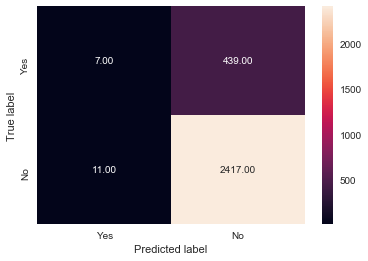

In [477]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [478]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.84


In [479]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

Precision :  0.39


In [480]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

Recall :  0.02


In [481]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [482]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [483]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.02


In [484]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [486]:
print('Specificity : ', round( specificity, 2 ) )

Specificity :  1.0


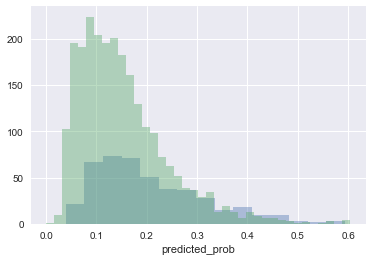

In [487]:
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )

In [488]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.67

In [489]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

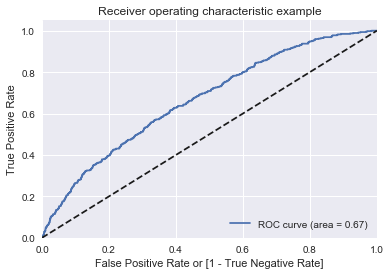

In [490]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

In [491]:
thresholds[0:10]

array([ 1.60458241,  0.60458241,  0.60455779,  0.60106532,  0.60088569,
        0.59405303,  0.56194609,  0.5617731 ,  0.56038411,  0.55795255])

In [492]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )

In [493]:
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

In [494]:
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]

,fpr,thresholds,tpr,diff
1206,0.383443,0.157974,0.616592,0.233149
1065,0.334432,0.169554,0.567265,0.232833
1239,0.394975,0.155705,0.627803,0.232827
1207,0.383855,0.157805,0.616592,0.232737
1233,0.392916,0.156311,0.625561,0.232645
1072,0.336903,0.169105,0.569507,0.232604
1201,0.381796,0.158269,0.614350,0.232554
1066,0.334843,0.169452,0.567265,0.232421
1240,0.395387,0.155602,0.627803,0.232416
1208,0.384267,0.157752,0.616592,0.232325


In [495]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.299 else 0)

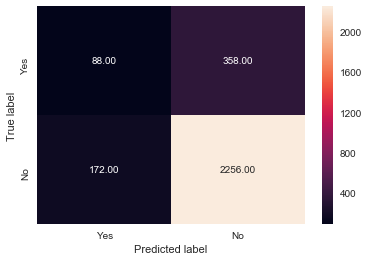

In [496]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

In [497]:
y_pred_df['predicted_final'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.299 else 0)

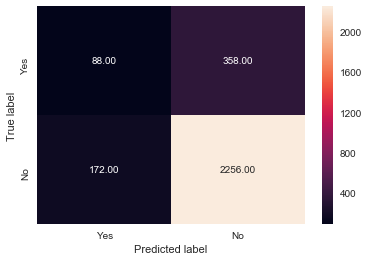

In [498]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_final )

In [499]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_final ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_final, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.82
Precision :  0.34
Recall :  0.2
Sensitivity :  0.2
Specificity :  0.93


##### Logistic Regression Model Fitting

In [500]:

X_train,X_test,y_train,y_test  =  train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Predicting the test set results and caculating the accuracy

In [501]:
y_predy_pred  =  logreg.predict((X_test))

In [502]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [503]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.841


##### Confusion Matrix

In [504]:
from  sklearn.metrics  import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2395   11]
 [ 461    7]]


The result is telling us that we have 2395+7 correct predictions and 461+11 incorrect predictions.

##### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [505]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2406
          1       0.39      0.01      0.03       468

avg / total       0.77      0.84      0.77      2874



In [508]:
loan_complete2.corr()

,credit.policy,days.with.cr.line,"delinq.2yrs_(0, 7]","delinq.2yrs_(7, 13]",dti,"fico_(650, 700]","fico_(700, 850]","inq.last.6mths_(0, 9]","inq.last.6mths_(18, 27]","inq.last.6mths_(27, 36]",...,"pub.rec_(0, 3]","pub.rec_(3, 5]",purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,revol.bal,revol.util
credit.policy,1.000000,0.099026,-0.053486,-0.035961,-0.090901,-0.166671,0.263134,-0.191642,-0.054943,-0.041526,...,-0.047703,-0.011123,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511,-0.187518,-0.104095
days.with.cr.line,0.099026,1.000000,0.085357,-0.003772,0.060101,-0.152263,0.176086,-0.037310,-0.013954,-0.020460,...,0.078939,0.004681,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883,0.229344,-0.024239
"delinq.2yrs_(0, 7]",-0.053486,0.085357,1.000000,-0.006431,-0.015395,0.185857,-0.201630,0.018087,-0.009826,-0.007427,...,0.000058,-0.005251,-0.011710,-0.001632,0.007000,-0.009658,-0.003061,0.001073,-0.025277,-0.030758
"delinq.2yrs_(7, 13]",-0.035961,-0.003772,-0.006431,1.000000,-0.023083,-0.002989,-0.019941,-0.010059,-0.000479,-0.000362,...,0.020813,-0.000256,-0.006895,0.009114,-0.003411,-0.004693,-0.003870,-0.004653,-0.007381,-0.006650
dti,-0.090901,0.060101,-0.015395,-0.023083,1.000000,0.149055,-0.152879,0.021701,0.015358,0.005377,...,0.012392,-0.021449,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245,0.188748,0.337109
"fico_(650, 700]",-0.166671,-0.152263,0.185857,-0.002989,0.149055,1.000000,-0.951944,0.074376,0.016331,0.013824,...,0.118512,0.017103,-0.011724,0.112512,0.006967,-0.063292,-0.025418,-0.049841,0.005974,0.377729
"fico_(700, 850]",0.263134,0.176086,-0.201630,-0.019941,-0.152879,-0.951944,1.000000,-0.085060,-0.030467,-0.023027,...,-0.121784,-0.016281,0.008804,-0.117517,-0.008874,0.062144,0.033846,0.057129,0.000480,-0.409996
"inq.last.6mths_(0, 9]",-0.191642,-0.037310,0.018087,-0.010059,0.021701,0.074376,-0.085060,1.000000,-0.033855,-0.025588,...,0.031080,-0.018092,-0.036969,-0.022870,0.011075,0.038912,0.011521,0.026232,0.003117,-0.014666
"inq.last.6mths_(18, 27]",-0.054943,-0.013954,-0.009826,-0.000479,0.015358,0.016331,-0.030467,-0.033855,1.000000,-0.000553,...,-0.006720,-0.000391,0.000887,-0.006998,-0.005212,-0.007170,0.012601,0.008605,-0.001531,0.000866
"inq.last.6mths_(27, 36]",-0.041526,-0.020460,-0.007427,-0.000362,0.005377,0.013824,-0.023027,-0.025588,-0.000553,1.000000,...,0.016755,-0.000295,0.007146,0.003606,-0.003939,-0.005419,-0.004469,-0.005373,-0.003975,0.000230


#### Variance Inflation Factor to check Multicolinearity

In [509]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [510]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [511]:
vif.round(1)

,VIF Factor,features
0,7.2,credit.policy
1,5.2,days.with.cr.line
2,1.2,"delinq.2yrs_(0, 7]"
3,1.0,"delinq.2yrs_(7, 13]"
4,5.1,dti
5,18.8,"fico_(650, 700]"
6,28.1,"fico_(700, 850]"
7,2.8,"inq.last.6mths_(0, 9]"
8,1.0,"inq.last.6mths_(18, 27]"
9,1.0,"inq.last.6mths_(27, 36]"
